# Calculating and comparing rates of return in python


## 1. difference between bonds and stock


### BONDS (GOVT)
3% RETURN;

LOW RISK ( VERY LESS CHANCE FOR A GOVT TO GO BANKRUPT)

INITIALINVESTMENT PLUS INTREST.

## STOCK

6% RETURN

HIGH FLUCTUTATION

PRICE CHANGE ( as different variables effects the companies share prices)

HIGHER UNCERTANITY AND RISK

## For me finanace is not about making good returns but making a very smart decision keeping in mind risks as well as returns, and optimizing the "risk return" combination of the investment portfolio

### the notebook structure

theory

realworld application

python implimation

## rate of return

#### simple rate of return = (ending price - beginning price)/ beginning price



#### logarithmic rate of return :

log(E.P/B.P) = log(E.P) - log(B.P)


*** we shouldn't both the returns together as it'll ruin our calculation

simple rate of return can be used when dealing with multiple assests over the same timeframe

log return can be used to make calculations about a single assest over time.

#### :> there are different kinds of time frameswe can use like yearly, monthly , daily.
annualy is the most famous.


#### annual = [(daily return + 1)^(365)] *100 - 1




## Expected rates of return :

we cannot predict the return but we can look at the historical data and predict an expected return which we might get. this is the closest we can predict future.








In [4]:
# calculating rate of return

import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt           # this allows us to use charts

In [7]:
PG = wb.DataReader('PG', data_source='yahoo' , start='1995-1-1')   # this line is used to find the stock details of proctor and gamble.

In [8]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,7.926647
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.863113
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.751913
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.767798
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.736029


In [9]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-09,156.759995,152.750000,153.960007,155.610001,8540800.0,155.610001
2022-05-10,156.619995,153.940002,155.550003,154.789993,7447400.0,154.789993
2022-05-11,155.899994,152.350006,154.029999,152.610001,7692200.0,152.610001
2022-05-12,153.610001,149.880005,153.520004,151.990005,9600800.0,151.990005
2022-05-13,153.729996,150.419998,152.580002,153.619995,5675200.0,153.619995


go to yahoo finance and PG stock prices. go check the historical data and see if there's anykind of error in your data.

https://finance.yahoo.com/quote/PG?p=PG&.tsrc=fin-srch

## simple return

(P1 - P0)/P0 = (P1/P0) - 1

P1 = today's rpice
P0 = yesterday's price

In [11]:
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1  # here the shift helps us to go to the yesterday's stock price. as it shifts index by '#' number specified
print (PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008015
1995-01-05   -0.014142
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2022-05-09   -0.002500
2022-05-10   -0.005270
2022-05-11   -0.014084
2022-05-12   -0.004063
2022-05-13    0.010724
Name: simple_return, Length: 6891, dtype: float64


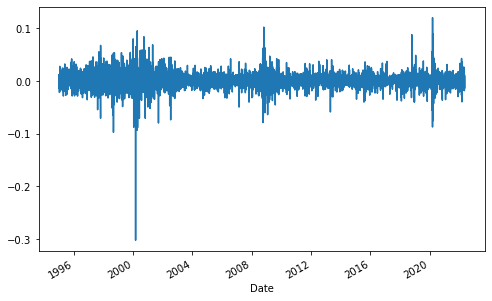

In [13]:
PG['simple_return'].plot(figsize=(8,5))  # these numbers simply determine the size of the graph
plt.show()

in fianance postive returns are important but to judge a stock perfectly we need to know about the negative returns too. it just helps to make a precise judgement.

In [14]:
avg_returns_d = PG['simple_return'].mean() # the term mean allows us to get the avg daily rate of return stright away. 
avg_returns_d

0.0005302987947642824

this number is much lower that 1%. and it's not very posibble to interpret it meaningfully. now let's take a look at annual avg return

### in a year there are 365 days but trading days aren't composed of saturdays, sundays and bank holidays so on avg 250 days are there

In [16]:
avg_returns_a = PG['simple_return'].mean()*250
avg_returns_a

0.1325746986910706

In [17]:
## now we can make it better by rounding it and making it in a percentage string

In [22]:
print (str(round(avg_returns_a,5)*100) + '%')  # here we made it a string with 5 digits and % sign at the end

13.257%


# logarithmic rate of return

we use numpy here as it offers the possibility of vectorized computation.
i.e. the ability to organize several kinds of data processing taks as array expression.

log returns = ln(Pt/P(t-1))

In [23]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,7.926647,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.863113,-0.008015
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.751913,-0.014142
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.767798,0.002049
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.736029,-0.004090


In [24]:
PG['log_returns'] = np.log(PG['Adj Close']/ PG['Adj Close'].shift(1))
print (PG['log_returns'])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2022-05-09   -0.002503
2022-05-10   -0.005284
2022-05-11   -0.014184
2022-05-12   -0.004071
2022-05-13    0.010667
Name: log_returns, Length: 6891, dtype: float64


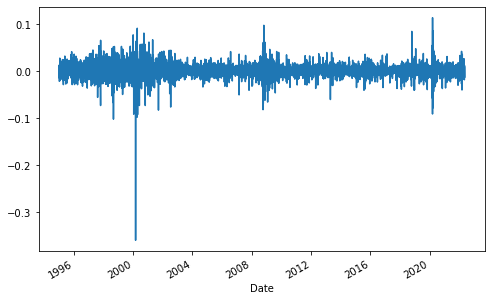

In [25]:
PG['log_returns'].plot(figsize=(8,5))
plt.show()

In [27]:
log_returns_d = PG['log_returns'].mean()
log_returns_d

0.0004302252313164331

In [30]:
log_returns_a = PG['log_returns'].mean() * 250
log_returns_a

0.10755630782910827

In [36]:
print (str(round(log_returns_a,5)*100) + '%') 

10.756%


In [37]:
## we can see the log returns are significantly smaller than the simple returns

# portfolio return

a portfolio is a collection of several stocks. this is the most common thing about investyors to own several stocks. so how to calculate rate of returns of a portfolio.

every investor tries to select and add stocks that will optimize the overall rate of return of his portfolio.



## rate of return of a portfolio = rate of return for a security * weight in portfolio

In [5]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib as plt

In [6]:
tickers = ['PG','MSFT','F','GE']  # stocks of proctor and gamble, microsoft, ford and general electrics
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t,data_source = 'yahoo', start = '1995-1-1')['Adj Close']


In [41]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6891 entries, 1995-01-03 to 2022-05-13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6891 non-null   float64
 1   MSFT    6891 non-null   float64
 2   F       6891 non-null   float64
 3   GE      6891 non-null   float64
dtypes: float64(4)
memory usage: 269.2 KB


In [42]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.926646,2.369954,4.307288,32.847813
1995-01-04,7.863114,2.387182,4.423178,32.847813
1995-01-05,7.751913,2.347805,4.384546,32.928314
1995-01-06,7.767798,2.387182,4.384546,32.767296
1995-01-09,7.736025,2.372415,4.461808,32.445274


In [45]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2022-05-09,155.610001,264.579987,13.37,72.970001
2022-05-10,154.789993,269.500000,13.35,73.309998
2022-05-11,152.610001,260.549988,12.83,72.440002
2022-05-12,151.990005,255.350006,12.44,73.279999
2022-05-13,153.619995,261.119995,13.50,75.050003


# normalize the data to 100

(Pt/P0) * 100

In [44]:
mydata.iloc[0]   # iloc[#] extracts the data from the specified column . here 0(first)

PG       7.926646
MSFT     2.369954
F        4.307288
GE      32.847813
Name: 1995-01-03 00:00:00, dtype: float64

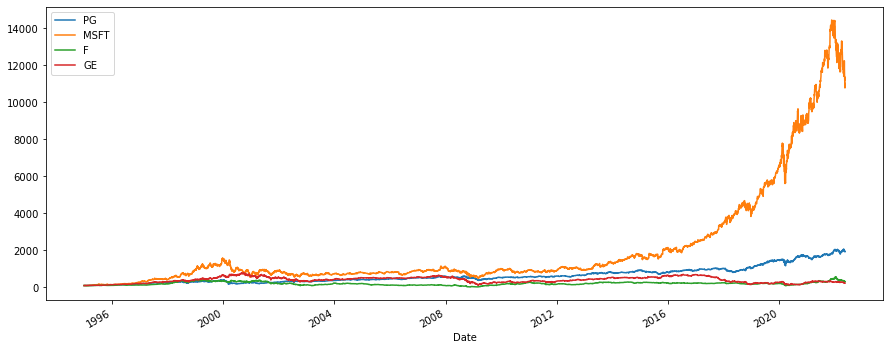

In [48]:
(mydata/mydata.iloc[0]*100).plot(figsize=(15,6));


<AxesSubplot:xlabel='Date'>

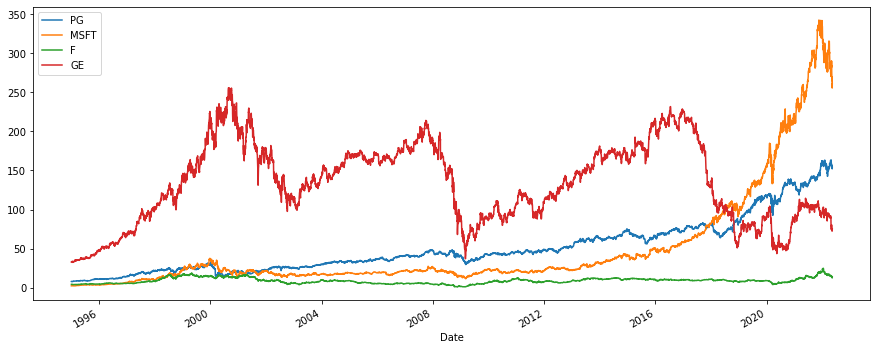

In [49]:
mydata.plot(figsize=(15,6))

In [51]:
mydata.loc['1995-01-03']

PG       7.926646
MSFT     2.369954
F        4.307288
GE      32.847813
Name: 1995-01-03 00:00:00, dtype: float64

In [52]:
mydata.iloc[0]

PG       7.926646
MSFT     2.369954
F        4.307288
GE      32.847813
Name: 1995-01-03 00:00:00, dtype: float64

In [1]:
## both these approaches lead to the same outcome i.e. loc['1995-1-1'] and lod[0] are the same things.

these kinds of analysis can help us determine which stock performed better historically and help us determine the future.

# calculating the return of a portfolio of securities

we use weights in an numpy array.

In [7]:
returns = (mydata / mydata.shift(1)) - 1

In [8]:
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008015,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [9]:
returns.tail()

,PG,MSFT,F,GE
Date,,,,
2022-05-09,-0.002500,-0.036945,-0.059113,-0.067238
2022-05-10,-0.005270,0.018596,-0.001496,0.004659
2022-05-11,-0.014084,-0.033210,-0.038951,-0.011867
2022-05-12,-0.004063,-0.019958,-0.030398,0.011596
2022-05-13,0.010724,0.022596,0.085209,0.024154


In [11]:
weights = np.array([0.25,0.25,0.25,0.25])  # a portfolio's weight must always sum upto 1

In [13]:
np.dot(returns , weights)  # dot product is the multiplication of vector or matrixs

array([        nan,  0.0065399 , -0.00922977, ..., -0.02452798,
       -0.01070553,  0.03567094])

In [15]:
## first we need the avg return
annual_returns = returns.mean() * 250
annual_returns

PG      0.132575
MSFT    0.219774
F       0.122018
GE      0.081582
dtype: float64

In [16]:
np.dot(annual_returns , weights)

0.13898707886122164

In [27]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5)*100) + '%'
print (pfolio_1)

13.899000000000001%


In [23]:
# now we can compare two portfolio's by using new weights

In [24]:
weights_2 = np.array([0.4,0.4,0.15,0.05])

In [25]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5)*100) + '%'
print (pfolio_1)
print (pfolio_2)

13.899000000000001%
16.332%


## market indices

the market index provides an idea of how a stock market is performing 

there are a lot of STOCK MARKETS like S&P, NASDAQ .
S&P comprises of the top 500 companies in the us. it's diverse and market cap weighted.





how to use it :
stock indices are an excellent comparator to understand how your own stocks are performing.

it also gives an idea of type of return we can expect if we invest in an well diversified portfolio.


In [28]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib as plt

In [33]:
tickers = ['^GSPC', '^IXIC', '^GDAXI']  #acronyms of different markets

ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source = 'yahoo', start = '2005-1-1')['Adj Close']

In [34]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
2004-12-31,1211.920044,2175.439941,NaN
2005-01-03,1202.079956,2152.149902,4291.529785
2005-01-04,1188.050049,2107.860107,4290.500000
2005-01-05,1183.739990,2091.239990,4258.240234
2005-01-06,1187.890015,2090.000000,4300.939941


In [35]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2022-05-09,3991.239990,11623.250000,13380.669922
2022-05-10,4001.050049,11737.669922,13534.740234
2022-05-11,3935.179932,11364.240234,13828.639648
2022-05-12,3930.080078,11370.959961,13739.639648
2022-05-13,4023.889893,11805.000000,14027.929688


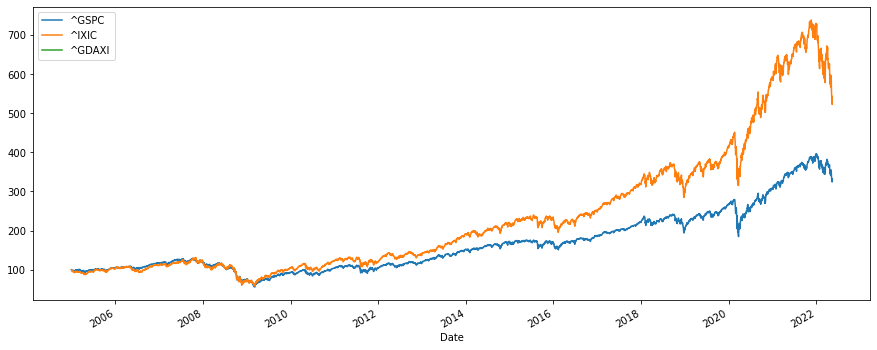

In [38]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15,6));


In [39]:
tickers = ['PG', "^GSPC", '^DJI']

data_2 = pd.DataFrame()

for t in tickers:
    data_2[t] = wb.DataReader(t,data_source = 'yahoo', start = '2007-1-1')['Adj Close']

In [40]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2022-05-09,155.610001,3991.239990,32245.699219
2022-05-10,154.789993,4001.050049,32160.740234
2022-05-11,152.610001,3935.179932,31834.109375
2022-05-12,151.990005,3930.080078,31730.300781
2022-05-13,153.619995,4023.889893,32196.660156


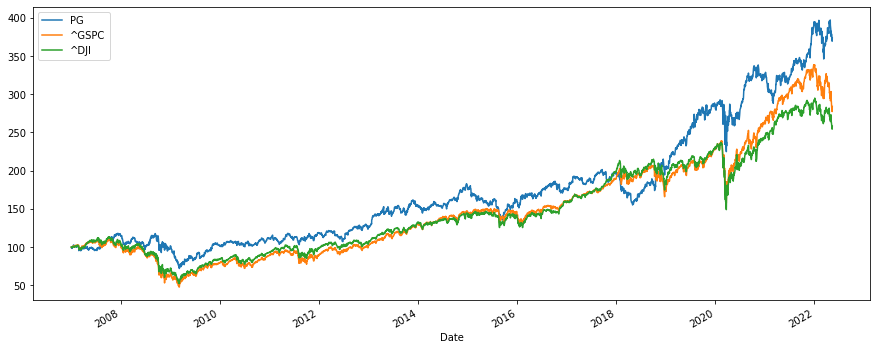

In [41]:
(data_2/data_2.iloc[0] * 100).plot(figsize=(15,6));